In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Importing the csv file

In [54]:
df=pd.read_csv('salaries.csv')
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [55]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [56]:

df.sample(2)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
282,Prof,A,51,51,Male,57800
51,Prof,B,12,11,Male,108875


In [57]:
df.shape

(397, 6)

In [58]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [60]:

df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [61]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

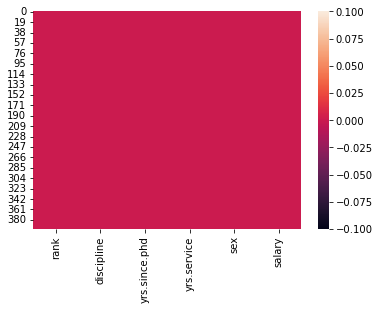

In [62]:
sns.heatmap(df.isnull())

# count the number of ranks

In [63]:
df['rank'].nunique()
print('The number of unique ranks:',df['rank'].nunique())

The number of unique ranks: 3


<AxesSubplot:title={'center':'Count plot for Ranks'}, xlabel='rank', ylabel='count'>

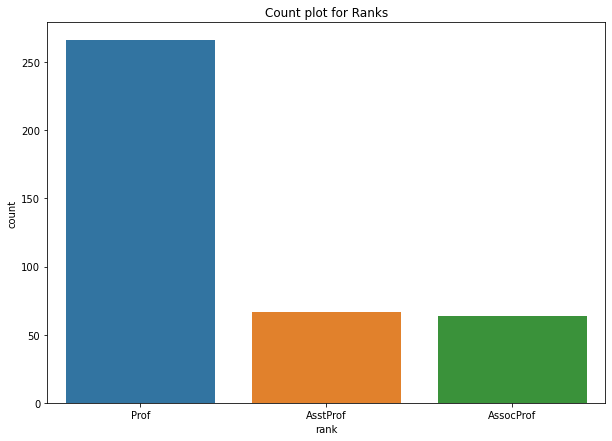

In [64]:
#count plot for different Ranks

plt.figure(figsize=(10,7))
plt.title('Count plot for Ranks')
sns.countplot(df['rank'])

<AxesSubplot:xlabel='sex', ylabel='count'>

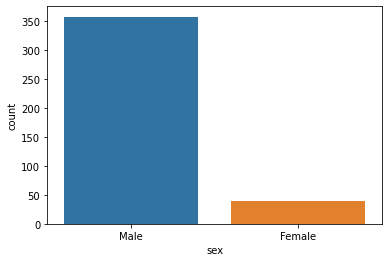

In [65]:
#Ratio of Male and Female

sns.countplot(df['sex'])

From the above plot we can see that the ratio of male is more than female.



# Label Encoder


we have to convert our categorical data in to Numerical data.
so we use Label Encoder

In [66]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [67]:
list=['sex','rank','discipline']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

In [68]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500


# Checking the Skewness: ruko

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

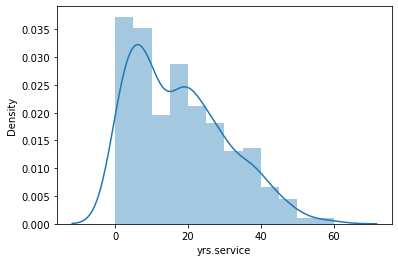

In [69]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

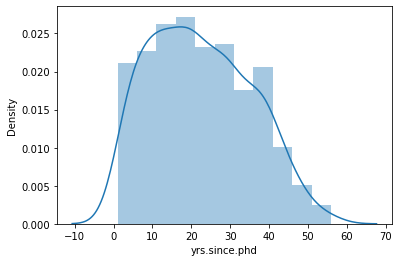

In [70]:
sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='rank', ylabel='Density'>

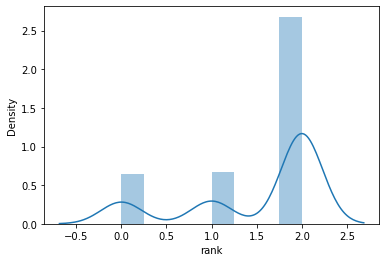

In [71]:
sns.distplot(df['rank'])

<AxesSubplot:xlabel='discipline', ylabel='Density'>

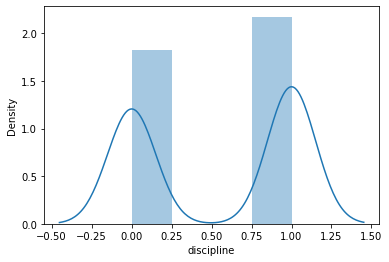

In [72]:
sns.distplot(df['discipline'])

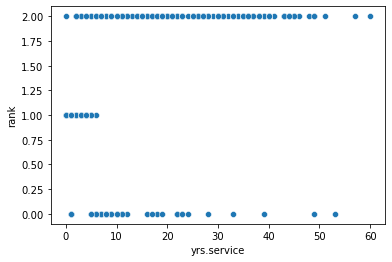

In [73]:
# relation b/w yrs of servie and rank

sns.scatterplot(df['yrs.service'],df['rank'])
plt.show()

# Correlation 

checking the correlation of the data

In [74]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


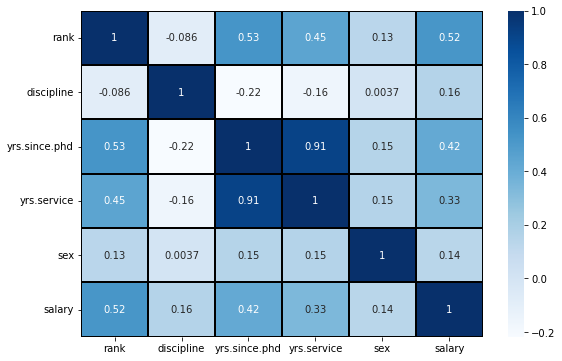

In [75]:
#correlation map

plt.figure(figsize=(9,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True,fmt='.2g',linewidth=2,linecolor='black')
plt.show()

# Data cleaning

In [76]:
df.drop('sex',axis=1,inplace=True)

# checking the outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc38475700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc38475e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc38475370>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc7b3e9580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc7b3e9910>],
 'means': []}

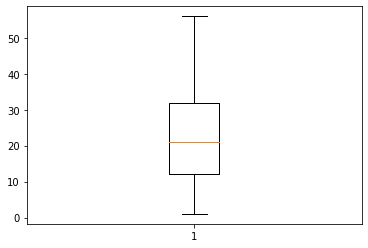

In [77]:
plt.boxplot(df['yrs.since.phd'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbc991de340>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbc991dea60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbc991cef70>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbc991eb1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbc991eb550>],
 'means': []}

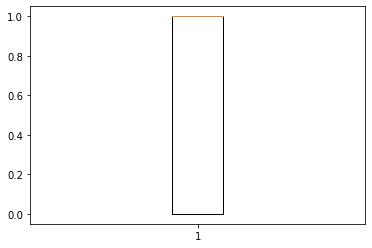

In [78]:
plt.boxplot(df['discipline'])

rank                AxesSubplot(0.125,0.657941;0.352273x0.222059)
discipline       AxesSubplot(0.547727,0.657941;0.352273x0.222059)
yrs.since.phd       AxesSubplot(0.125,0.391471;0.352273x0.222059)
yrs.service      AxesSubplot(0.547727,0.391471;0.352273x0.222059)
salary                 AxesSubplot(0.125,0.125;0.352273x0.222059)
dtype: object

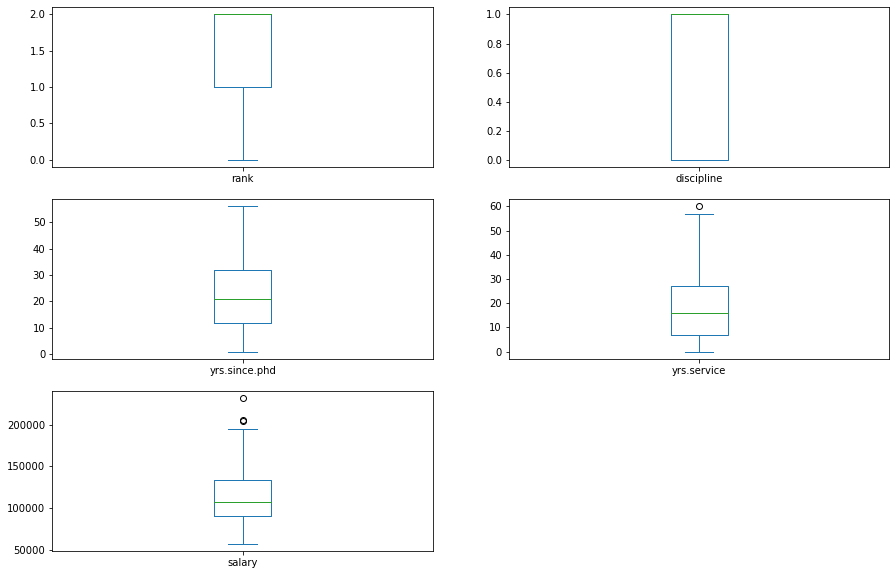

In [79]:
df.plot(kind='box',subplots=True,layout=(3,2),figsize=(15,10))

From above plots we can see that our dataset is with very few outliers

# Z score

for removing  the outliers from dataset

In [80]:
from scipy.stats import zscore

In [81]:
z=np.abs(zscore(df))
z

,rank,discipline,yrs.since.phd,yrs.service,salary
0,0.649257,0.915403,0.257550,0.029669,0.860919
1,0.649257,0.915403,0.179854,0.124300,1.966672
2,0.672564,0.915403,1.422982,1.125098,1.122495
3,0.649257,0.915403,1.762533,1.646343,0.042760
4,0.649257,0.915403,1.374055,1.800312,0.918768
...,...,...,...,...,...
392,0.649257,1.092415,0.830187,0.953483,0.350418
393,0.649257,1.092415,0.674796,0.106654,1.218396
394,0.649257,1.092415,1.529446,0.568560,0.395640
395,0.649257,1.092415,0.208623,0.201284,0.607502


In [82]:
thresshold=3
print(np.where(z>3))


(array([ 43, 131, 330, 364]), array([4, 3, 3, 4]))


In [83]:
dfnew=df[(z<3).all(axis=1)]
x=dfnew
x

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


In [86]:
x=x.iloc[:,0:-1]
x.shape

(393, 4)

In [87]:
y=x.iloc[:,-1]
y.shape

(393,)

In [88]:
x.skew()

rank            -1.135734
discipline      -0.179514
yrs.since.phd    0.288531
yrs.service      0.588861
dtype: float64

In [89]:
#skewness Removel

from sklearn.preprocessing  import power_transform

In [90]:
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
ss=StandardScaler()

In [93]:
x=ss.fit_transform(x)
x

array([[ 0.69481738,  0.91457564, -0.11344983,  0.26888583],
       [ 0.69481738,  0.91457564, -0.03455335,  0.1209006 ],
       [-1.0753989 ,  0.91457564, -1.6242611 , -1.28449532],
       ...,
       [ 0.69481738, -1.09340328,  1.42772852,  0.72581897],
       [ 0.69481738, -1.09340328,  0.33874878,  0.04312953],
       [-1.0753989 , -1.09340328, -1.12908354, -1.11979784]])

# Train test split

Dividing the data in to train and test sets

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=43)

In [95]:
x_train.shape

(314, 4)

In [96]:
x_test.shape

(79, 4)

In [97]:
y_train.shape

(314,)

In [98]:
y_test.shape

(79,)

# Model-1

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)

In [101]:
print('error')

print('Mean Absolute Error',mean_absolute_error(y_test,predlr))
print('Mean Squared Error',mean_squared_error(y_test,predlr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,predlr)))

error
Mean Absolute Error 2.0509981083671938
Mean Squared Error 6.105504318913949
Root Mean Squared Error 2.470931872576407


# R2 score

In [102]:
print(r2_score(y_test,predlr))

0.9536461357384951


# Model--2

In [103]:
from  sklearn.neighbors import KNeighborsRegressor

In [104]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred=knn.predict(x_test)

In [105]:
print('error')

print('Mean Absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean Absolute Error 0.9544303797468355
Mean Squared Error 1.877974683544305
Root Mean Squared Error 1.370392164142916


# R2 score

In [106]:
print(r2_score(y_test,pred))

0.9857421469184973


# Model-3

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)


1.0

In [109]:
print('error')

print('Mean Absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean Absolute Error 0.9544303797468355
Mean Squared Error 1.877974683544305
Root Mean Squared Error 1.370392164142916


# R2 score

In [110]:
print(r2_score(y_test,pred))

0.9857421469184973


# Saving the model

In [112]:
import joblib
joblib.dump(dt,'dtfile.obj')
dt_from_joblib=joblib.load('dtfile.obj')
